# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
CLOUD = False
if CLOUD: 
    !pip -q install ./python
    !pip -q install toml
    !pip -q install requests
    !pip freeze > requirements.txt

In [2]:
# from unityagents import UnityEnvironment
# import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [3]:
# env = UnityEnvironment(file_name="...")
# env = UnityEnvironment(file_name="envs/Tennis_Windows_x86_64/Tennis.exe")

Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

When finished, you can close the environment.

In [4]:
# env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

from tennis_agents.factory import TennisFactory
from tennis_agents.workspace_utils import active_session
from tennis_agents.plotting import plot_scores

In [6]:
# Inst classes
factory = TennisFactory()
data = factory.read_toml('config.toml')
envh = factory.get_environment_manager(data)

In [20]:

# Separate run instance if reload config
data = factory.read_toml('config.toml')
maddpg = factory.get_agent(data)
trainer = factory.get_trainer(data, envh, maddpg)


In [21]:
display(data)

{'environment': {'ENV_FILE': 'envs\\Tennis_Windows_x86_64\\Tennis.exe',
  'STATE_SIZE': 24,
  'ACTION_SIZE': 2,
  'UPPER_BOUND': 1.0,
  'SOLVED': 0.5,
  'ROOT_NAME': 'tennis',
  'SEED': 42},
 'trainer': {'N_EPISODES': 2000, 'MAX_T': 2000, 'WINDOW_LEN': 100},
 'memory': {'BATCH_SIZE': 256, 'BUFFER_SIZE': 200000},
 'agent': {'N_AGENTS': 2,
  'LEARN_F': 1,
  'GAMMA': 0.99,
  'TAU': 0.001,
  'LR_ACTOR': 0.0002,
  'LR_CRITIC': 0.0002,
  'WEIGHT_DECAY': 0.0,
  'ACTOR_HIDDEN': [64, 64],
  'CRITIC_HIDDEN': [64, 64],
  'ACTOR_ACT': 'relu',
  'CRITIC_ACT': 'leaky_relu',
  'ADD_NOISE': [True, True],
  'BATCH_NORM': True},
 'noise': {},
 'OU': {'SIGMA': 0.01, 'MU': 0.0, 'THETA': 0.15},
 'AP': {'INITIAL_STD': 0.1, 'DESIRED_ACTION_STD': 0.1, 'ADOPTION_COEF': 1.01}}

In [22]:
trainer.magent.agents[0].device


device(type='cuda', index=0)

In [23]:
display(trainer.magent.agents[0].actor_local)
display(trainer.magent.agents[0].critic_local)

DDPGActor(
  (fc1): Linear(in_features=24, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=2, bias=True)
  (bn1): BatchNorm1d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn3): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

DDPGCritic(
  (fc1): Linear(in_features=24, out_features=64, bias=True)
  (fc2): Linear(in_features=66, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=1, bias=True)
  (bn1): BatchNorm1d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm1d(66, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn3): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

In [24]:
if CLOUD:
    with active_session():
        scores = trainer.train()
else:
    scores = trainer.train()

D:\ProgramData\miniconda3\envs\drlnd\lib\site-packages\torch\nn\functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Ep 41	Mean (ep): 0.0000	Best (all): 0.0000	Mean (window): 0.0000

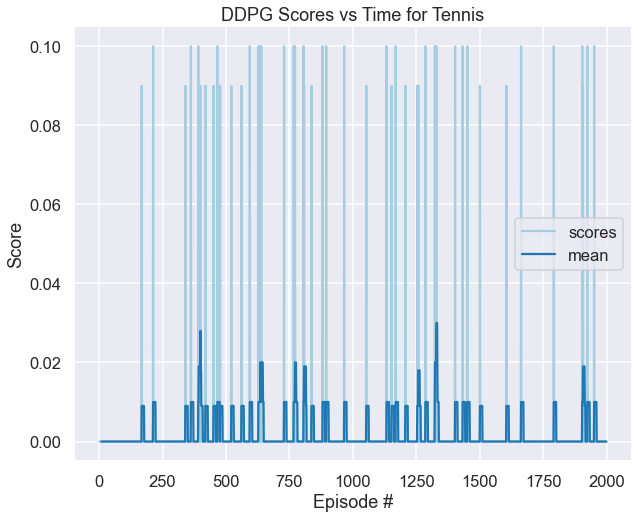

In [ ]:
plot_scores(scores)

In [ ]:
trainer.save_scores('runs/scores-checkpoint.pkl')